# Question 1

Probabilities:
\begin{equation*}
P(Cancer+) = 1.5%
\end{equation*}

\begin{equation*}
P(Cancer-) = 98.5%
\end{equation*}

\begin{equation*}
P(T+ | Cancer+) = 87%
\end{equation*}

\begin{equation*}
P(T+ | Cancer-) = 9.6%
\end{equation*}


Bayes rule:
\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)} {P(B)}
\end{equation*}

\begin{equation*}
P(Cancer+|T+) = \frac{P(T+|C+)P(C+)} {P(T+)}
\end{equation*}

Total probability of P(T+)
\begin{equation*}
P(T+) = P(T+ | C-)P(C-) + P(T+ | C+)P(C+)
\end{equation*}

\begin{equation*}
P(T+) = 0.091*0.985+0.87*0.015
\end{equation*}
\begin{equation*}
P(T+) = 0.103
\end{equation*}

Replace with values:
\begin{equation*}
P(C+|T+) = \frac{0.87*0.015}{0.103}
\end{equation*}
\begin{equation*}
P(C+|T+) = 0.127
\end{equation*}

### Answer

The real anser would have to be **E**. Since the probability of having cancer is really low, and since the tests have a fairly hight change of being positive enven though you don't have cancer does not help the end probability of having cancer knowing the test was positive. 

# Question 2

### 1.
Volume for hyper cubes:

\begin{equation*}
V=c^d
\end{equation*}

### 2. 
The probability density must integrate to 1 when considering the whole region.
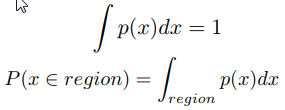

### 3.



\begin{equation*}
P(WholeRegion) = P(T) = 1 = \frac{c^d}{c^d}
\end{equation*}

\begin{equation*}
P(InternalCube) = P(I) = \frac{(c-2*0.03*c)^d}{c^d}
\end{equation*}

\begin{equation*}
P(Edge) = P(E) = P(T) - P(I)
\end{equation*}

### 4.

\begin{equation*}
P(E) = 1- \frac{(c-2*0.03*c)^d}{c^d}
\end{equation*}


In [8]:
def pe(c,d):
    return 1-(((c-2*0.03*c)**d)/c**d)

print("When c=100 and d=1: ")
print(round(pe(100,1),6))
print("\nWhen c=100 and d=2: ")
print(round(pe(100,2),6))
print("\nWhen c=100 and d=3: ")
print(round(pe(100,3),6))
print("\nWhen c=100 and d=5: ")
print(round(pe(100,5),6))
print("\nWhen c=100 and d=10: ")
print(round(pe(100,10),6))
print("\nWhen c=100 and d=100: ")
print(round(pe(100,100),6))
print("\nWhen c=100 and d=1000: ")
print("Can be assumed =1")

When c=100 and d=1: 
0.06

When c=100 and d=2: 
0.1164

When c=100 and d=3: 
0.169416

When c=100 and d=5: 
0.266096

When c=100 and d=10: 
0.461385

When c=100 and d=100: 
0.997945

When c=100 and d=1000: 
Can be assumed =1


### 5. Conclusion

# Question 3

### 1.
* a)
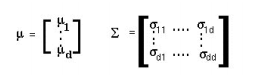


* b)
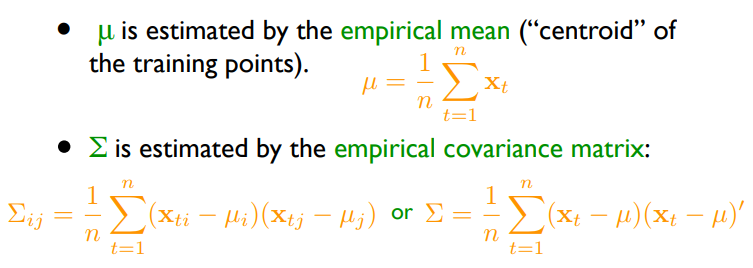

* c)


* d)
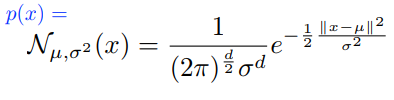

* e)


### 2
* a)
The training phase consist on finding the empirical mean(i.e. the "centroid" of the training points)

* b) 

### 4
* c)
\begin{equation*}
\hat{f}(D_{train})=argmin_{f \epsilon F}\hat{R}(f,D_{train})
\end{equation*}

\begin{equation*}
\hat{R}(f,D) = \frac{1}{|D|}\sum_{(x,y) \epsilon D} L(f(x),y)
\end{equation*}

\begin{equation*}
L(f(x),y)=-Log(p(x))
\end{equation*}

#### Answer:
\begin{equation*}
\hat{f}(D_{train})=argmin_{f \epsilon F}(\frac{1}{|D|}\sum_{(x,y) \epsilon D} -Log(p(x)))
\end{equation*}

# Question4

In [41]:
import numpy as np
import random
import pylab
import time

# load iris
iris = np.loadtxt('iris.txt')
data = iris

# Number of classes
n_classes = 3
# Size of training set
n_train = 100

# The columns (features) on which to train our model
# For gridplot to work, len(train_cols) should be 2
train_cols = [0,1]
# The index of the column containing the labels
target_ind = [data.shape[1] - 1]

# Comment to have random (non-deterministic) results 
random.seed(3395)
# Randomly choose indexes for the train and test dataset
inds = list(range(data.shape[0]))
random.shuffle(inds)
train_inds = inds[:n_train]
test_inds = inds[n_train:]

# Split the data into both sets
train_set = data[train_inds,:]
train_set = train_set[:,train_cols + target_ind]
test_set = data[test_inds,:]
test_set = test_set[:,train_cols + target_ind]

# Separate the test set into inputs and labels
test_inputs = test_set[:,:-1]
test_labels = test_set[:,-1].astype('int32')
train_inputs = train_set[:, :-1]
train_labels = train_set[:, -1].astype('int32')

### 1

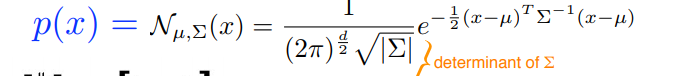

In [46]:
class gaussianDensityEstimator:
    # def __init__(self):
        
    def train(self, trainInputs, d): # no need for the labels since this is a density estimator
        self.covMatrix = np.cov(trainInputs, rowvar=False) # TODO not sure if this should transposed or not.
        print(self.covMatrix)
        print(self.covMatrix.shape)
        self.meanVector = np.mean(trainInputs, axis=0).reshape(d,1)
        if self.covMatrix.size == 1  :
            self.covDeterminant = self.covMatrix.reshape(1,1)[0] 
        else :
            self.covDeterminant = np.linalg.det(self.covMatrix)
        
        
    def predict(self, X):
        d = X.shape[1]
        left = 1 / ( ((2*np.pi)**(d/2))*(self.covDeterminant**0.5) )
        sub = X - self.meanVector.T
        print(np.transpose(X.T - self.meanVector).dot( np.linalg.inv(self.covMatrix)))
        right = np.exp(-0.5 * np.transpose(X.T - self.meanVector).dot( np.linalg.inv(self.covMatrix)).dot(X.T - self.meanVector))
        return -np.log(left * right) # returns the lost function
    



In [50]:
model = gaussianDensityEstimator()

t1 = time.clock()
d = train_inputs.shape[1] # Dimension
model.train(train_inputs, d)
t2 = time.clock()
print('It took ', t2-t1, ' seconds to train on ', train_inputs.shape[0],' train set examples')

result = model.predict(test_inputs[:1])
print(result)


[[ 0.61969697 -0.03166667]
 [-0.03166667  0.17197071]]
(2, 2)
It took  0.0009434160128876101  seconds to train on  100  train set examples
[[2.99658949 0.22033985]]
[[3.47923769]]


### 2
This is the Parzen density estimator with an isotropic Gaussian kernal formula (extracted from the slides):
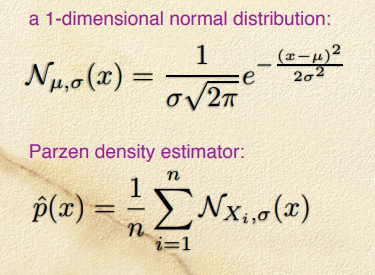

But since we want the kernal to work on *d* dimensions:
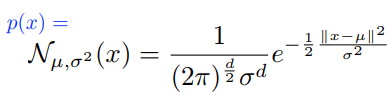

In [ ]:

## Training is simply the action of remembering the trainin set.

